Import Libraries  (Plot.py)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]WARNING:absl:1738 images were corrupted and were skipped


Dataset cats_vs_dogs downloaded and prepared to C:\Users\user\tensorflow_datasets\cats_vs_dogs\4.0.0. Subsequent calls will reuse this data.


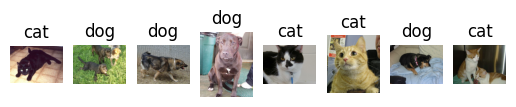

In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

i = 0
fig, ax = plt.subplots(1, 8)
for image, label in testDataset.take(8):
    ax[i].axis('off')
    ax[i].set_title(classNames[label])
    ax[i].imshow(image)
    i += 1

plt.show()

Load Data (Train.py)

Epoch 1/10
509/509 [==============================] - 474s 928ms/step - loss: 0.6112 - accuracy: 0.6690 - val_loss: 0.5494 - val_accuracy: 0.7282
Epoch 2/10
509/509 [==============================] - 479s 941ms/step - loss: 0.4781 - accuracy: 0.7735 - val_loss: 0.4653 - val_accuracy: 0.7826
Epoch 3/10
509/509 [==============================] - 475s 933ms/step - loss: 0.3857 - accuracy: 0.8251 - val_loss: 0.4674 - val_accuracy: 0.7823
Epoch 4/10
509/509 [==============================] - 481s 945ms/step - loss: 0.2778 - accuracy: 0.8828 - val_loss: 0.6371 - val_accuracy: 0.7641
Epoch 5/10
509/509 [==============================] - 452s 888ms/step - loss: 0.2011 - accuracy: 0.9200 - val_loss: 0.8178 - val_accuracy: 0.7695
Epoch 6/10
509/509 [==============================] - 467s 918ms/step - loss: 0.1543 - accuracy: 0.9399 - val_loss: 0.8122 - val_accuracy: 0.7530
Epoch 7/10
509/509 [==============================] - 470s 923ms/step - loss: 0.0913 - accuracy: 0.9663 - val_loss: 1.0644 -

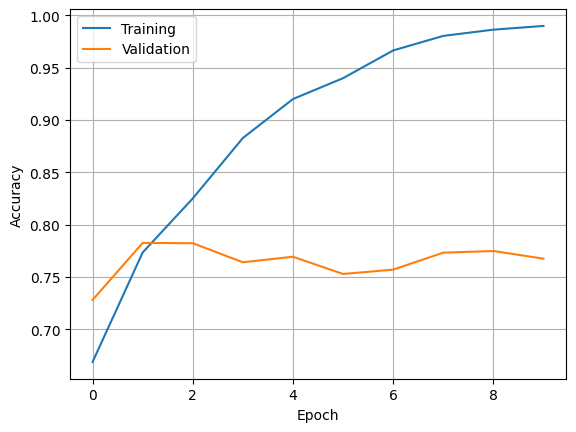

219/219 [==============================] - 36s 162ms/step - loss: 1.1901 - accuracy: 0.7676
1.1900594234466553
0.7675884962081909


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from matplotlib import pyplot as plt


def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, label


HEIGHT = 200
WIDTH = 200
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

trainDataset = trainDataset.map(preprocess).batch(32)
testDataset = testDataset.map(preprocess).batch(32)

model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

trainHistory = model.fit(trainDataset, epochs=10, validation_data=testDataset)

plt.plot(trainHistory.history['accuracy'])
plt.plot(trainHistory.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

(loss, accuracy) = model.evaluate(testDataset)
print(loss)
print(accuracy)

model.save('model.h5')


Test.py 

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


8/8 [==============================] - 1s 39ms/step


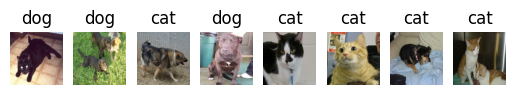

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from matplotlib import pyplot as plt


def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, tf.cast(label, tf.float32)


HEIGHT = 200
WIDTH = 200
classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

testDataset = testDataset.map(preprocess).batch(1)

model = keras.models.load_model('model.h5')

predictions = model.predict(testDataset.take(8))

i = 0
fig, ax = plt.subplots(1, 8)
for image, _ in testDataset.take(8):
    predictedLabel = int(predictions[i] >= 0.5)

    ax[i].axis('off')
    ax[i].set_title(classNames[predictedLabel])
    ax[i].imshow(image[0])
    i += 1

plt.show()